In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()

In [47]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [48]:
iris.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [49]:
df = pd.DataFrame(iris.data,columns=iris.feature_names)
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [50]:
df['target'] = iris.target
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [51]:
df[df.target==1].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
50,7.0,3.2,4.7,1.4,1
51,6.4,3.2,4.5,1.5,1
52,6.9,3.1,4.9,1.5,1
53,5.5,2.3,4.0,1.3,1
54,6.5,2.8,4.6,1.5,1


In [52]:
df[df.target==2].head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
100,6.3,3.3,6.0,2.5,2
101,5.8,2.7,5.1,1.9,2
102,7.1,3.0,5.9,2.1,2
103,6.3,2.9,5.6,1.8,2
104,6.5,3.0,5.8,2.2,2


In [53]:
#df['flower_name'] =df.target.apply(lambda x: iris.target_names[x])
#df.head()

In [54]:
from sklearn.model_selection import train_test_split

In [55]:
X = df.drop(['target'], axis='columns')
y = df.target

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [57]:
len(df)

150

In [58]:
len(X_train)

120

In [59]:
len(X_test)

30

In [60]:
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=10)

In [61]:
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=10)

In [62]:
knn.score(X_test, y_test)

0.9666666666666667

In [63]:
from sklearn.metrics import confusion_matrix
y_pred = knn.predict(X_test)
y_pred


array([0, 1, 1, 0, 2, 1, 2, 0, 0, 2, 1, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       2, 0, 2, 1, 0, 0, 1, 2])

In [64]:
y_test

14     0
98     1
75     1
16     0
131    2
56     1
141    2
44     0
29     0
120    2
94     1
5      0
102    2
51     1
78     1
42     0
92     1
66     1
31     0
35     0
90     1
84     1
77     1
40     0
125    2
99     1
33     0
19     0
73     1
146    2
Name: target, dtype: int64

In [65]:
# Calculate accuracy score using sklearn
from sklearn.metrics import accuracy_score

# Method 1: Using sklearn accuracy_score function
accuracy = accuracy_score(y_test, y_pred)

print("🎯 ACCURACY SCORE CALCULATION")
print("="*35)
print(f"Sklearn Accuracy Score: {accuracy:.4f}")
print(f"Accuracy Percentage: {accuracy:.2%}")

🎯 ACCURACY SCORE CALCULATION
Sklearn Accuracy Score: 0.9667
Accuracy Percentage: 96.67%


In [66]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[11,  0,  0],
       [ 0, 12,  1],
       [ 0,  0,  6]])

In [67]:
prediction = knn.predict([[4.8,3.0,1.5,0.3]])
print(f"Prediction for a new flower: {prediction[0]}")
   

Prediction for a new flower: 0


c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(


In [ ]:

# Convert prediction number to flower name
flower_names = iris.target_names
predicted_flower = flower_names[prediction[0]] # flower_name[0]
print(f"The flower type is: {predicted_flower}")

The flower type is: setosa


In [69]:
# Predict for multiple flowers at once
multiple_flowers = [
    [4.8, 3.0, 1.5, 0.3],  # Small petals - likely Setosa
    [6.5, 3.0, 5.2, 2.0],  # Large petals - likely Virginica
    [5.7, 2.8, 4.1, 1.3],  # Medium petals - likely Versicolor
    [5.0, 3.5, 1.3, 0.3],  # Another potential Setosa
    [6.7, 3.1, 5.6, 2.4],  # Another potential Virginica
]

print("🌸 PREDICTIONS FOR MULTIPLE FLOWERS")
print("="*45)

print("🎯 INSURANCE PREDICTIONS FOR 5 NEW PEOPLE")
print("="*50)

for flower in multiple_flowers:
    # Get binary prediction (0 or 1)
    prediction = knn.predict([flower])
    predicted_flower = flower_names[prediction[0]]
    print(f"The flower type is: {predicted_flower}")

🌸 PREDICTIONS FOR MULTIPLE FLOWERS
🎯 INSURANCE PREDICTIONS FOR 5 NEW PEOPLE
The flower type is: setosa
The flower type is: virginica
The flower type is: versicolor
The flower type is: setosa
The flower type is: virginica


c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  warnings.warn(
c:\harmeet\machine_learning_2025\.venv\lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but KNe

BREAST CANCER

In [1]:
import pandas as pd
df = pd.read_csv("breast-cancer.csv")
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [2]:
df.shape

(569, 32)

In [3]:
X = df.drop(['id', 'diagnosis'], axis='columns')
y = df.diagnosis

In [5]:
X.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [73]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

In [74]:
X_train.head()

,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,fractal_dimension_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
408,17.99,20.66,117.80,991.7,0.10360,0.13040,0.120100,0.088240,0.1992,0.06069,...,21.080,25.41,138.10,1349.0,0.14820,0.37350,0.33010,0.19740,0.3060,0.08503
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.198000,0.104300,0.1809,0.05883,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.40000,0.16250,0.2364,0.07678
307,9.00,14.40,56.36,246.3,0.07005,0.03116,0.003681,0.003472,0.1788,0.06833,...,9.699,20.07,60.90,285.5,0.09861,0.05232,0.01472,0.01389,0.2991,0.07804
386,12.21,14.09,78.78,462.0,0.08108,0.07823,0.068390,0.025340,0.1646,0.06154,...,13.130,19.29,87.65,529.9,0.10260,0.24310,0.30760,0.09140,0.2677,0.08824
404,12.34,14.95,78.29,469.1,0.08682,0.04571,0.021090,0.020540,0.1571,0.05708,...,13.180,16.85,84.11,533.1,0.10480,0.06744,0.04921,0.04793,0.2298,0.05974


In [75]:
X_train.shape

(455, 30)

In [76]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [77]:
X_train.shape

(455, 30)

In [78]:
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)

In [79]:
knn.fit(X_train,y_train)

KNeighborsClassifier(n_neighbors=3)

In [80]:
from sklearn.metrics import accuracy_score

y_pred = knn.predict(X_test)

accuracy_score(y_test, y_pred)

0.9473684210526315

In [81]:
scores = []

for i in range(1,16):
    
    knn = KNeighborsClassifier(n_neighbors=i)
    
    knn.fit(X_train,y_train)
    
    y_pred = knn.predict(X_test)

    scores.append(accuracy_score(y_test, y_pred))
    
print(scores)

[0.9385964912280702, 0.9385964912280702, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.956140350877193, 0.9473684210526315, 0.9473684210526315, 0.9473684210526315, 0.956140350877193, 0.956140350877193, 0.956140350877193]


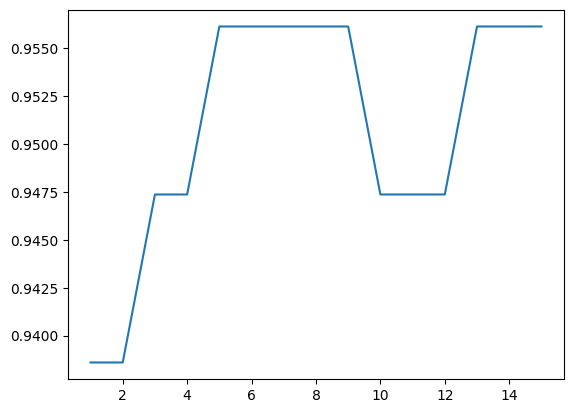

In [82]:
import matplotlib.pyplot as plt

plt.plot(range(1,16),scores)